In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft, fftfreq
from pydub import AudioSegment
import matplotlib
from pydub.playback import play

In [3]:
audio = AudioSegment.from_wav('Sound_Files/All_C_1/6_7.wav')
audio

In [4]:
class Analyzer:

    def __init__(self, file_path,source='Sound_Files/All_C_1/'):
        self.audio = AudioSegment.from_wav(source+file_path)
        self.file_name = file_path
        self.SAMPLE_RATE, self.data = wav.read(source+file_path)
        self.DURATION = len(self.audio)/1000
        self.xf, self.stft_out = None, None

    def play_file(self):
        return self.audio

    def split_audio(self, k=1):

        s = np.round(len(self.audio)/k)
        return [self.audio[i*s:(i+1)*s] for i in range(k)]
        # return np.split(self.audio,k)

    def get_data(self):
        return self.data

    def split_data(self, k=1):
        return np.split(self.data,k)

    def stft(self, k=1):
        arr = self.split_data(k)

        duration = self.DURATION / k
        # N = self.SAMPLE_RATE * self.DURATION
        N = int(self.SAMPLE_RATE * duration)

        self.xf = fftfreq(N, 1 / self.SAMPLE_RATE)
        return self.xf,np.array([fft(arr[i]) for i in range(k)])

    def plot(self, l, r,save_path,k=1,lim=1,rows=1,my_top=0.9):
        cols = int(k/rows)
        fig, axs = plt.subplots(rows,cols,figsize=(20,3*rows))
        cur_data, cur_out = self.stft(k)
        fig.suptitle('File ' + self.file_name)
        fig.subplots_adjust(top=my_top)
        if lim > len(cur_out):
            lim = len(cur_out)
        cur_out = cur_out[:lim]
        for i in range(lim):
            x = int(i/cols)
            y = i%cols
            if k == 1:
                cur_ax = axs
            else:
                if rows == 1:
                    cur_ax = axs[y]
                else:
                    cur_ax = axs[x,y]
            cur_ax.title.set_text('Split ' + str(i+1))
            cur_ax.plot(cur_data,np.abs(cur_out[i]))

            cur_ax.set_ylim(0,2e7)
            cur_ax.set_xlim(l,r)
        if k==1:
            axs.set(xlabel='Frequencies', ylabel='Amplitudes')
        else:
            for ax in axs.flat:
                ax.set(xlabel='Frequencies', ylabel='Amplitudes')

            # Hide x labels and tick labels for top plots and y ticks for right plots.
            for ax in axs.flat:
                ax.label_outer()

        fig.subplots_adjust(hspace=.2)
        plt.savefig('STFT_Graphs/' + save_path)


        plt.show()


In [5]:
matplotlib.rcParams.update({'font.size': 12})


In [6]:
test = Analyzer('1_7.wav')
# Gets an stft of 10 splits
x, stft_arr = test.stft(10)

In [7]:
x_fft, fft_arr = test.stft(1)

In [8]:
def get_difs(arr):
    a = np.abs(arr)
    out = []
    for i in range(len(arr) - 1):
        out.append(a[i+1]-a[i])
    return np.array(out)

In [9]:
# Gets the difference between each vector in stft
np.abs(stft_arr)[5]

array([ 7258.        , 27931.97388843, 22137.0074522 , ...,
       31595.0108753 , 22137.0074522 , 27931.97388843])

In [10]:
x.shape

(14400,)

(0.0, 5000.0)

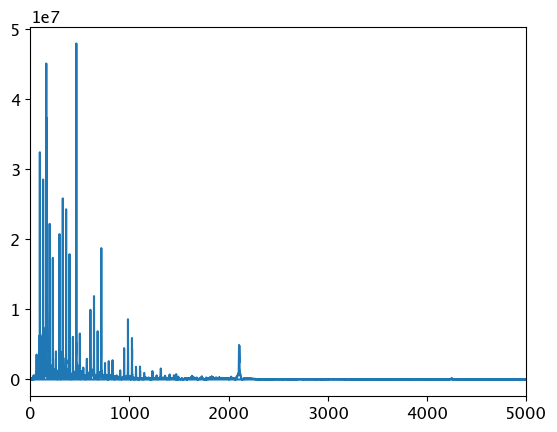

In [11]:
plt.plot(x_fft,np.abs(fft_arr[0]))
plt.xlim(0,5000)

(0.0, 5000.0)

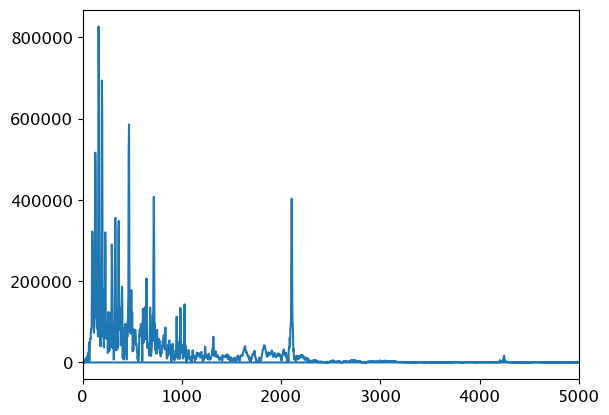

In [12]:
difs = get_difs(stft_arr)

plt.plot(x, np.abs(np.mean(difs,axis=0)))
plt.xlim(0,5000)

In [14]:
np.save('difs',difs)

In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
X
from sklearn.mixture import GMM

ImportError: cannot import name 'GMM' from 'sklearn.mixture' (/Users/vamsiimmanneni/opt/anaconda3/envs/aml/lib/python3.10/site-packages/sklearn/mixture/__init__.py)

In [ ]:
gm = GaussianMixture(n_components=2, random_state=1).fit(X)
# gm.means
#
# gm.predict([[0, 0], [12, 3]])

(0.0, 5000.0)

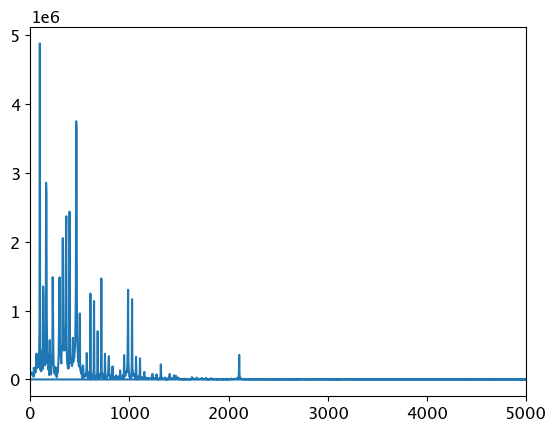

In [21]:
stft_arr.shape
plt.plot(x,np.abs(stft_arr[4]))
plt.xlim(0,5000)

In [36]:
stft_arr[1]-stft_arr[0]

array([ 1.35530000e+04+0.00000000e+00j, -7.64573307e+03+7.49766130e+03j,
       -1.28200234e+03+4.13901905e+03j, -7.96299782e+02+1.20235714e+03j,
        2.48925999e+01+1.73477602e+03j, -2.68515100e+02+8.70181045e+02j,
       -5.87690964e+02+8.82764996e+02j,  6.23876487e+01+8.47086948e+02j,
       -1.15657918e+02+5.75684470e+02j, -4.35107106e+02+5.46070009e+02j,
       -4.22891774e+02+4.85221086e+02j, -8.43114376e+01+5.80845312e+02j,
       -3.03327044e+01+2.76339746e+01j, -6.73215858e+01+4.97884719e+02j,
       -1.09447455e+02+4.11050439e+02j, -3.48517503e+01+3.23096757e+02j,
       -1.71854322e+02+3.57744709e+02j, -1.11942287e+02+3.20899052e+02j,
       -1.93597980e+02+3.19676190e+02j, -1.03356027e+01+3.54988282e+02j,
       -1.39811015e+02+1.91531176e+02j, -1.02290968e+02+2.94765132e+02j,
       -9.56450482e+01+2.84970685e+02j, -1.78494731e+02+1.97184979e+02j,
       -9.90000000e+01+2.06114046e+02j, -1.06083746e+02+2.35805159e+02j,
       -2.54425002e+01+2.50010120e+02j, -1.56484995

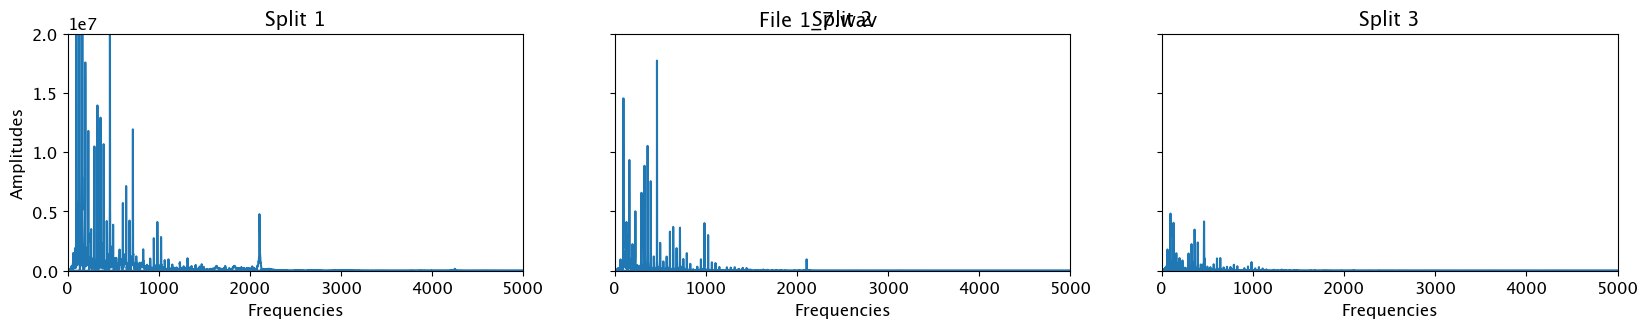

In [39]:
test.plot(0,5000,'1_7',3,3)

In [9]:
stft_arr = np.array(stft_arr)
stft_arr.shape

/var/folders/ks/zwy_9sbs4015bptyt10yyvbc0000gn/T/ipykernel_78860/776183535.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  stft_arr = np.array(stft_arr)


(2,)

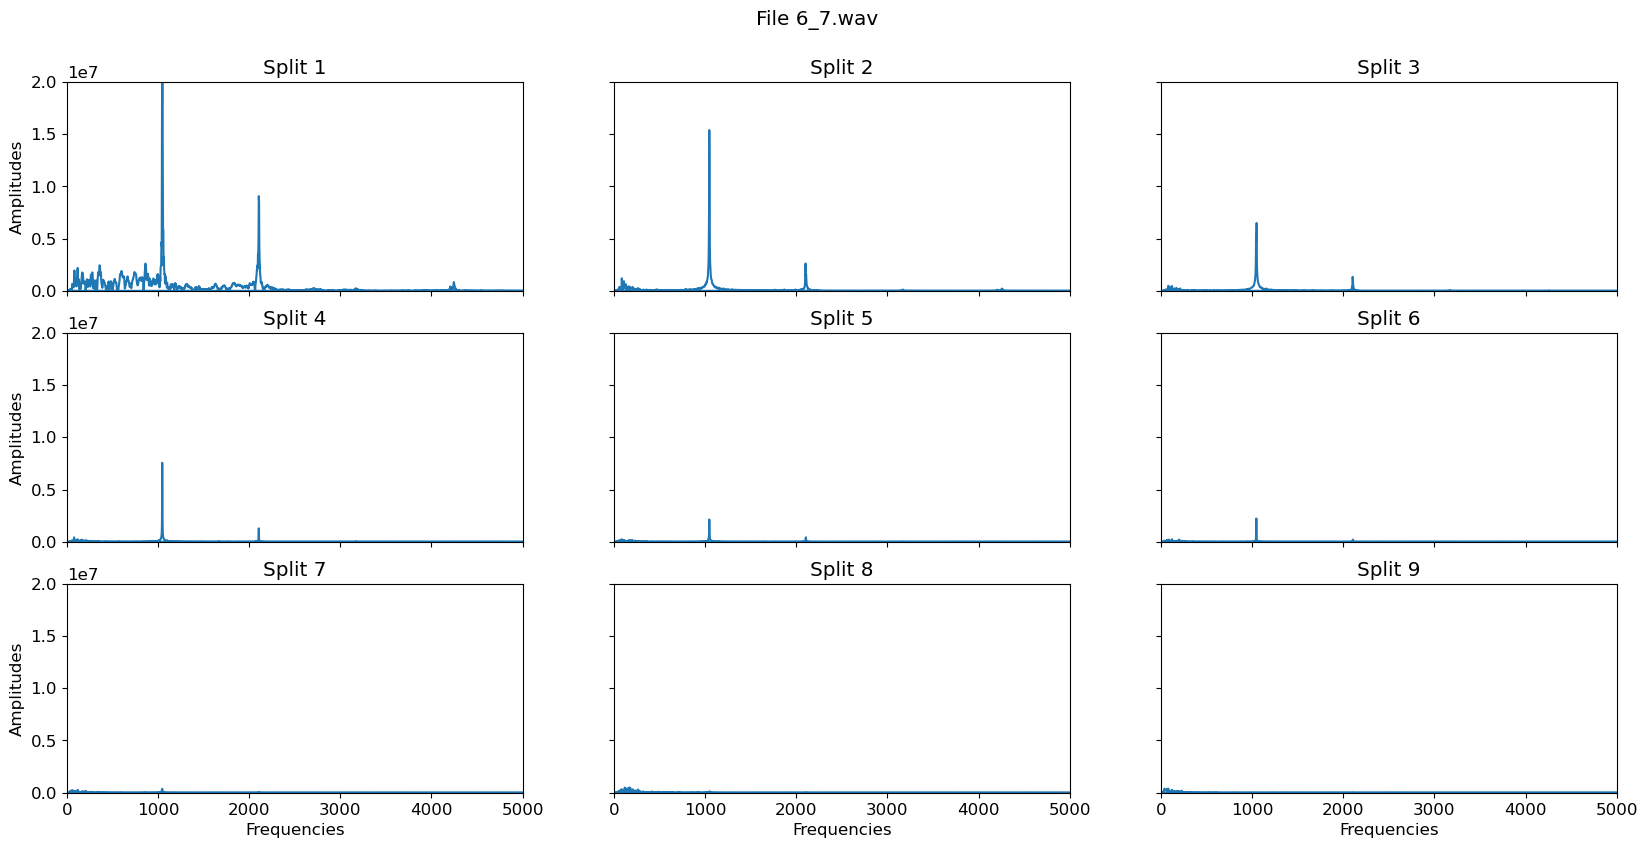

In [185]:
# Create an object with the path file
test = Analyzer('6_7.wav')

# Plot graph for an stft with a left limit, right limit, and number of splits
test.plot(0,5000,'6_7',9,3)


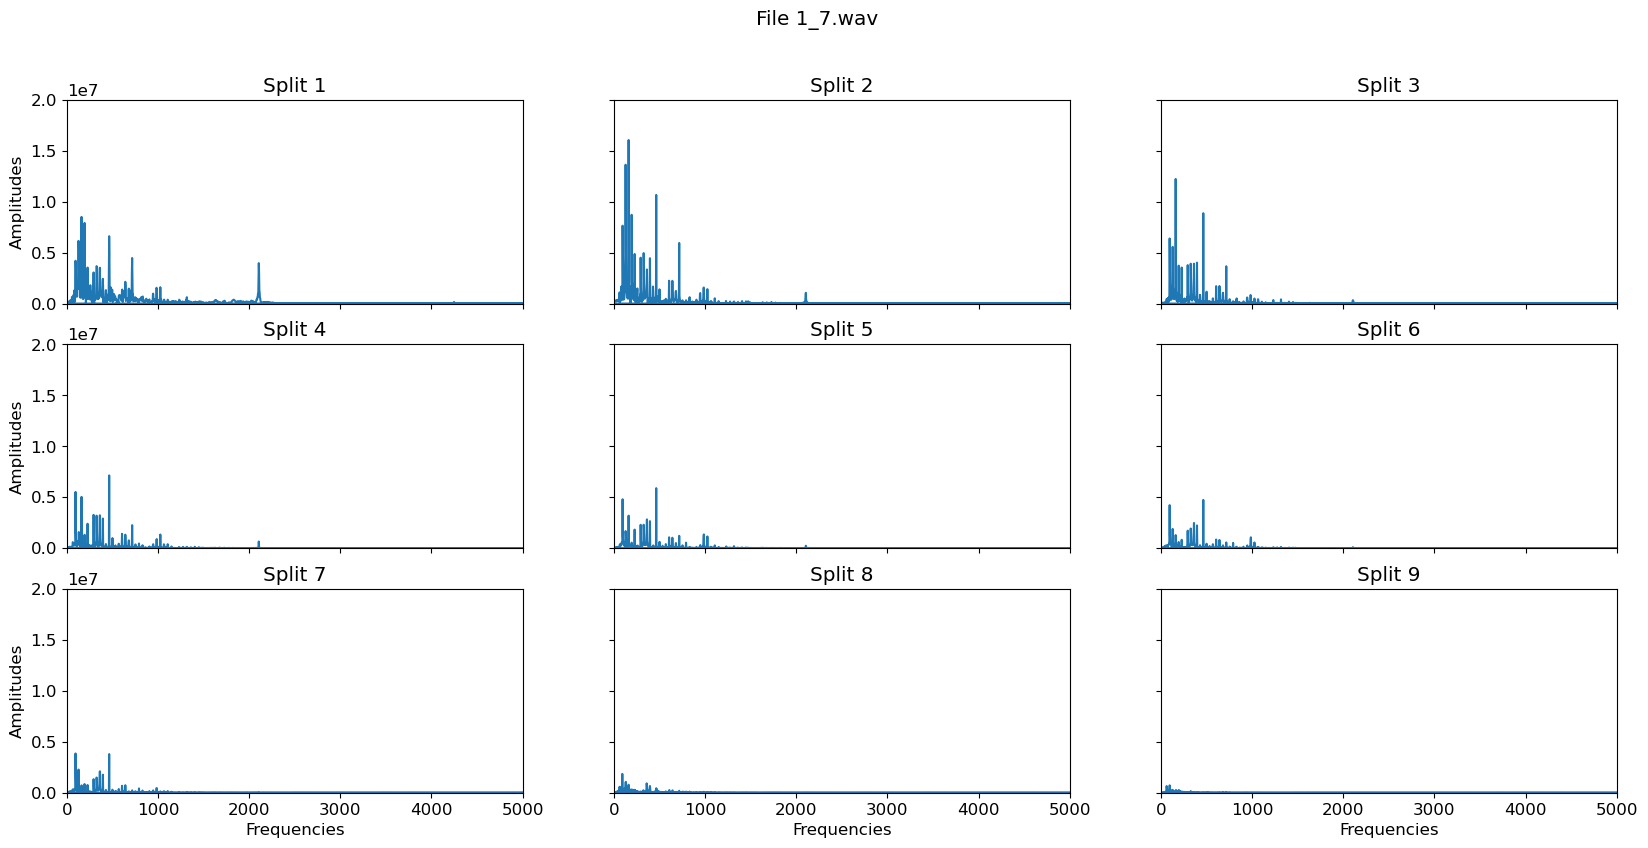

In [170]:
# Create an object with the path file
test = Analyzer('1_7.wav')
test.plot(0,5000,'1_7',9,3)

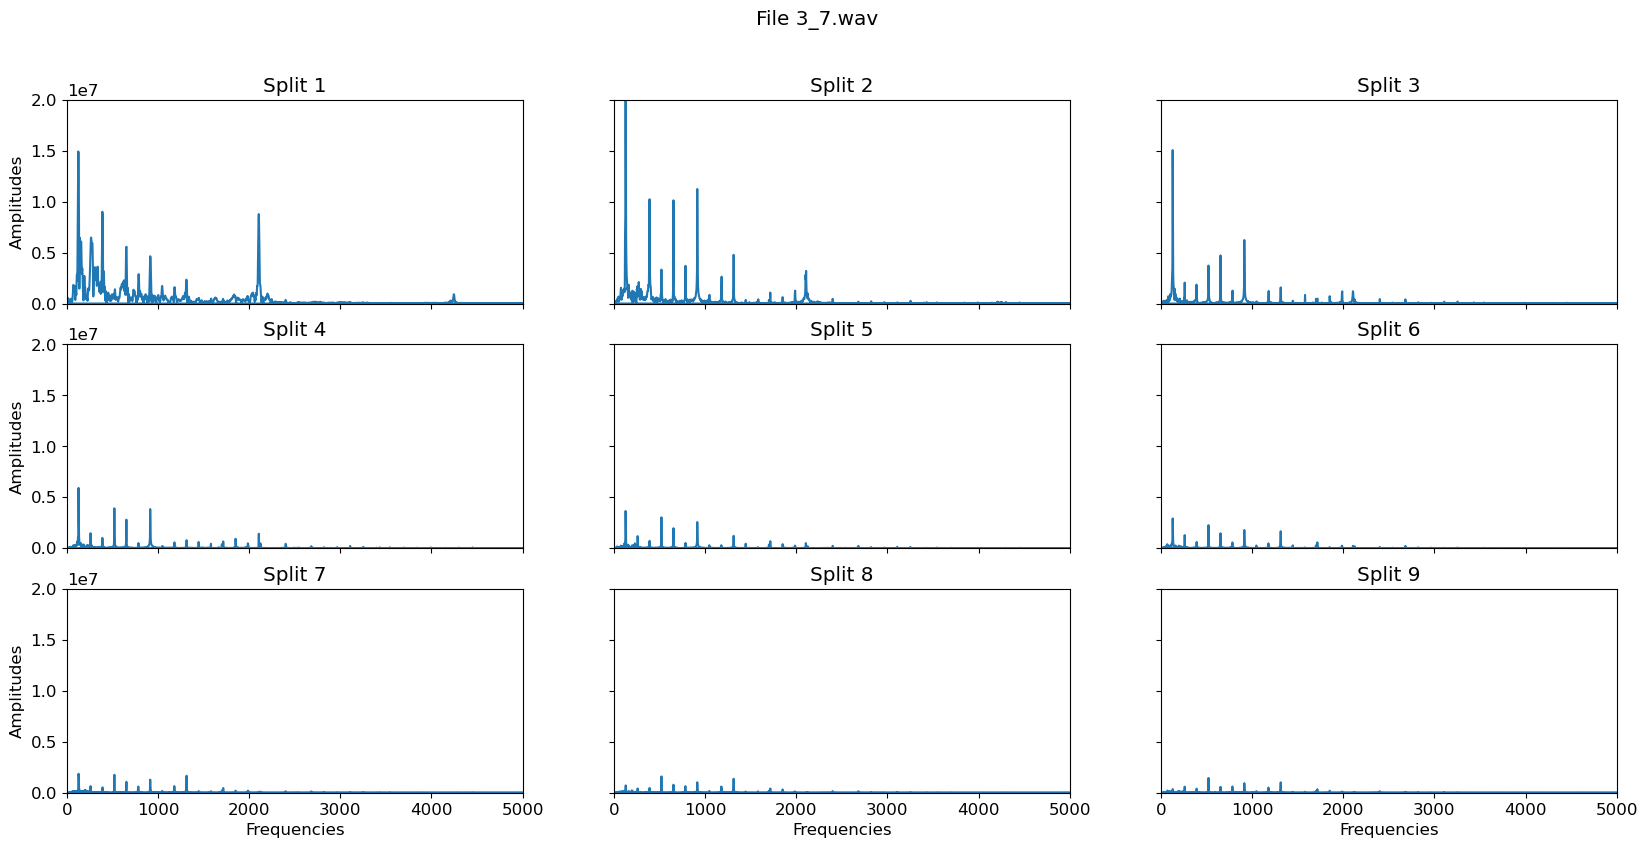

In [171]:
test = Analyzer('3_7.wav')
test.plot(0,5000,'3_7',9,3)

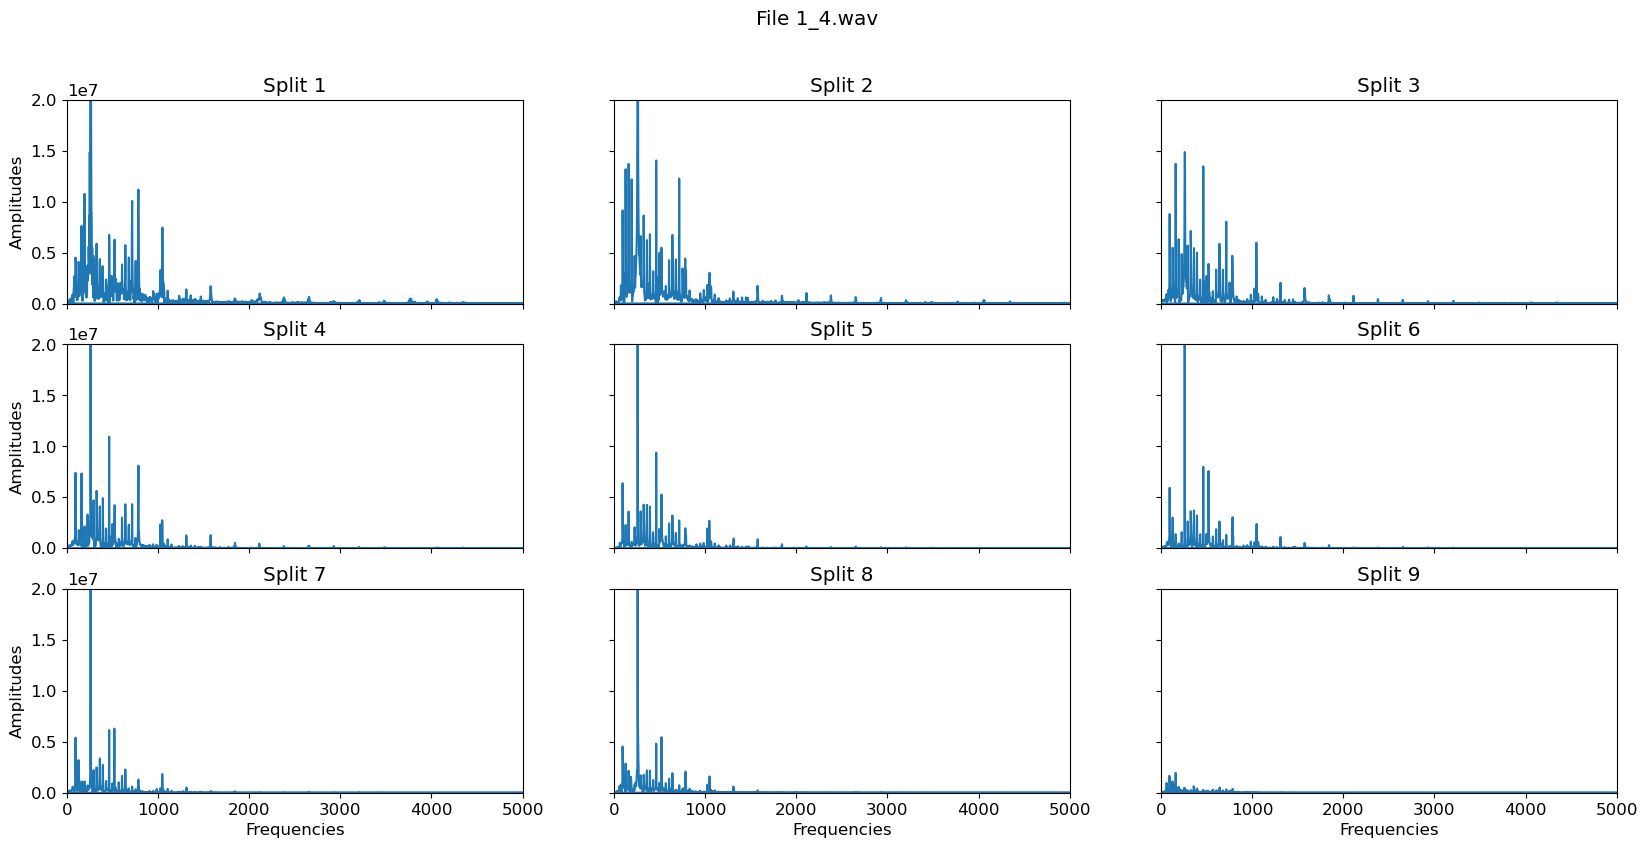

In [172]:
test = Analyzer('1_4.wav')
test.plot(0,5000,'1_4',9,3)

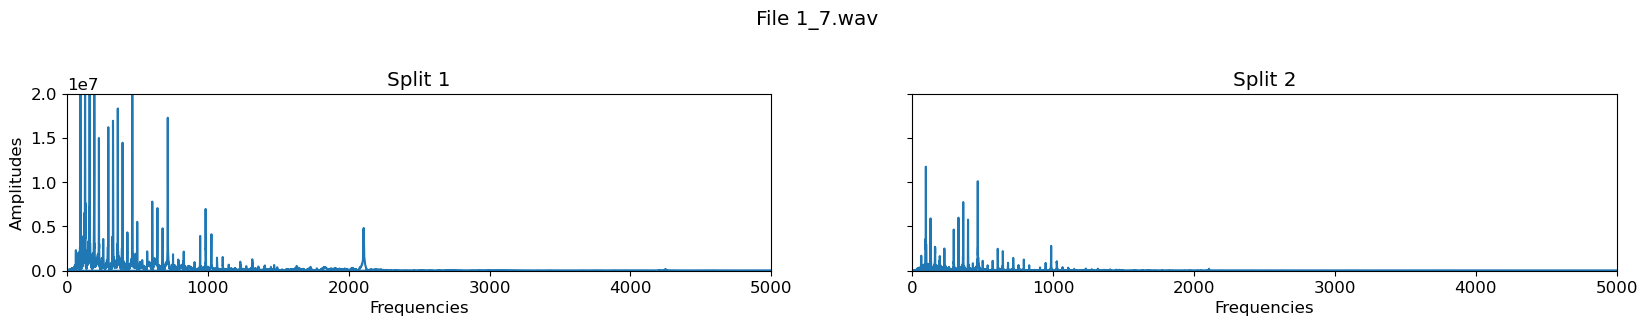

In [194]:
test = Analyzer('1_7.wav')
test.plot(0,5000,'1_7_2_split',2,1,0.7)

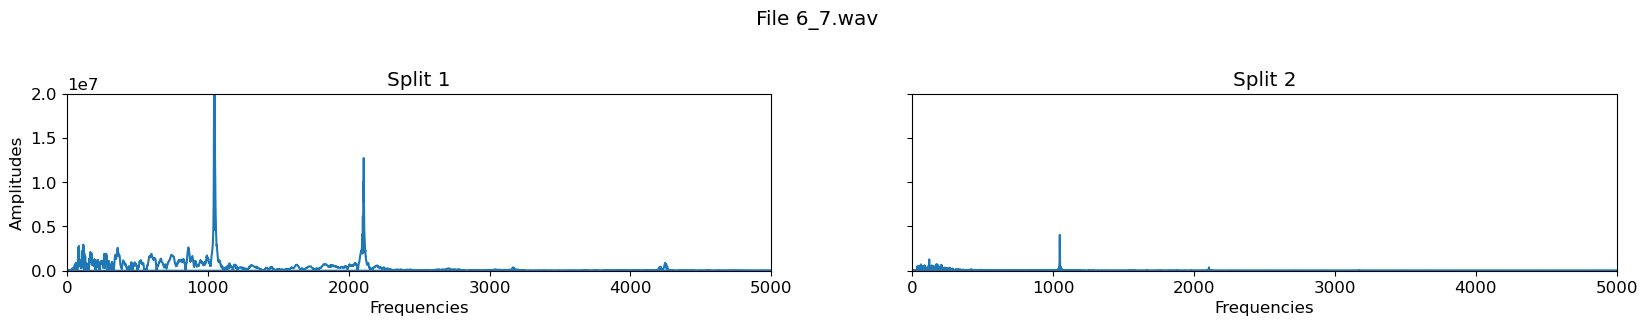

In [195]:
test = Analyzer('6_7.wav')
test.plot(0, 5000, '6_7_2_split', 2, 1,0.7)

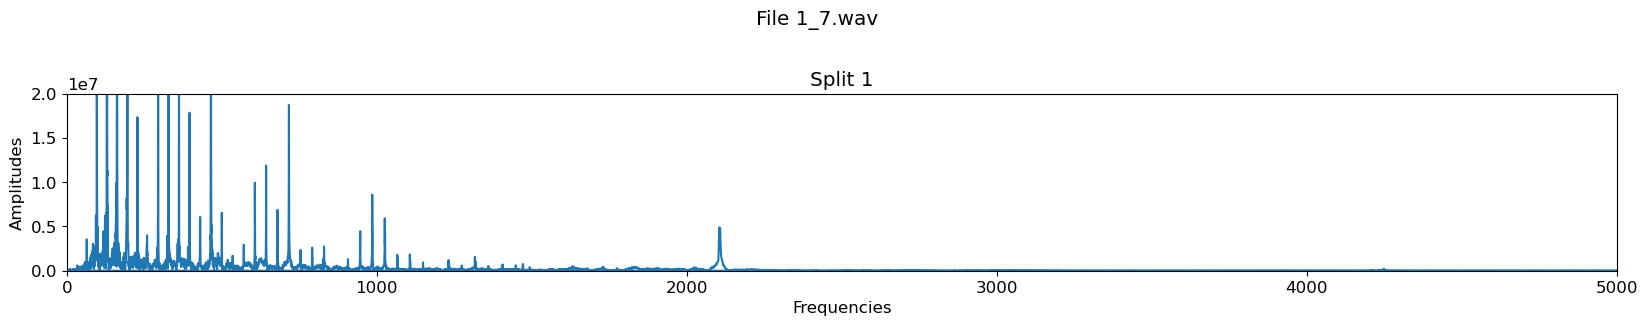

In [201]:
test = Analyzer('1_7.wav')
test.plot(0,5000,'1_7_fft',1,1,0.7)

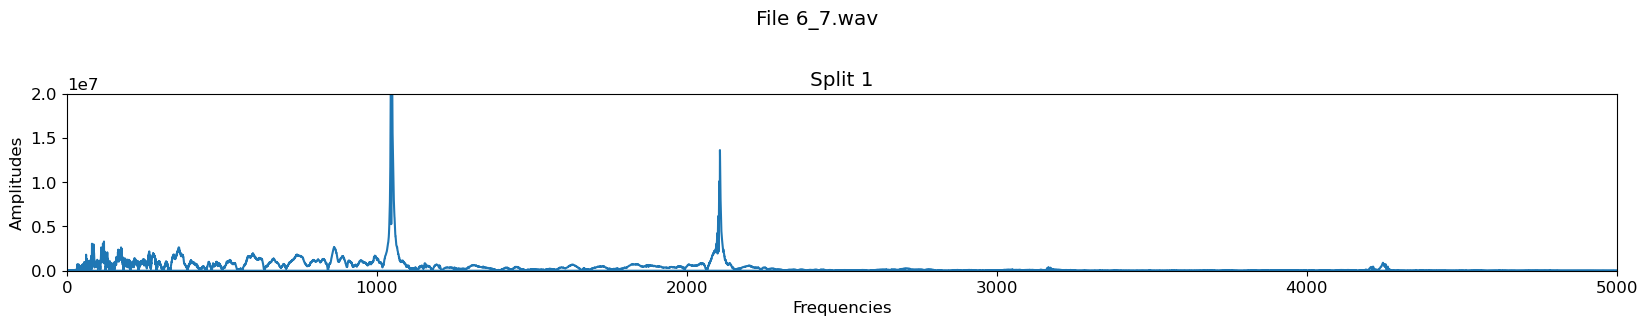

In [202]:
test = Analyzer('6_7.wav')
test.plot(0,5000,'6_7_fft',1,1,0.7)